<a href="https://colab.research.google.com/github/PRAN20/Spam_Classifier/blob/main/SpamChecker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Header Files**

In [ ]:
import pandas as pd
import sklearn 
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt

**Importing DataSets**

In [ ]:
data=pd.read_csv("spam.csv")
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


**Dealing With DataSets**

In [ ]:
data.shape

(5728, 2)

In [ ]:
data.isnull().sum()

text    0
spam    0
dtype: int64

**Removing Duplicates**

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(5695, 2)

**Splitting DataSets**

In [ ]:
data["text"].str.split("Subject:").str.get(1)

0        naturally irresistible your corporate identit...
1        the stock trading gunslinger  fanny is merril...
2        unbelievable new homes made easy  im wanting ...
3        4 color printing special  request additional ...
4        do not have money , get software cds from her...
                              ...                        
5723     re : research and development charges to gpg ...
5724     re : receipts from visit  jim ,  thanks again...
5725     re : enron case study update  wow ! all on th...
5726     re : interest  david ,  please , call shirley...
5727     news : aurora 5 . 2 update  aurora version 5 ...
Name: text, Length: 5695, dtype: object

**Running Across DataSets**

In [ ]:
data["text"]=data["text"].str.split("Subject:").str.get(1)

In [ ]:
data["text"][5727]

' news : aurora 5 . 2 update  aurora version 5 . 2  - the fastest model just got faster -  epis announces the release of aurora , version 5 . 2  aurora the electric market price forecasting tool is already  legendary for power and speed . we \' ve combined a powerful chronological  dispatch model with the capability to simulate the market from 1  day to 25 + years . add to that a risk analysis section , powered by user  selectable monte carlo & / or latin hypercube modeling , enough  portfolio analysis power to please the toughest critic , & inputs and  outputs from standard excel & access tables and you \' ve got one of most  powerful tools in the market .  just a few months ago we expanded our emissions modeling  capabilities , added our quarterly database update , increased the speed  of the entire model , and made  but that wasn \' t enough .  we \' ve done it again . some of the operations that we \' ve  included . . .  two new reporting enhancements .  the first is marginal repor

In [ ]:
data["text"][1]

' the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no  libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no  sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no '

**Saving The Cleared DataSet**

In [ ]:
data.to_csv("cleaned_spam.csv")

**We need to Download Stopwords Package**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Function**

In [ ]:
def process_text(text):
    nopunc=[char for char in text if char not in string.punctuation]
    nopunc="".join(nopunc)
    
    clean_words=[word for word in nopunc.split() if word.lower() not in stopwords.words("english")]
    
    return clean_words

In [ ]:
data['text'].head().apply(process_text)

0    [naturally, irresistible, corporate, identity,...
1    [stock, trading, gunslinger, fanny, merrill, m...
2    [unbelievable, new, homes, made, easy, im, wan...
3    [4, color, printing, special, request, additio...
4    [money, get, software, cds, software, compatib...
Name: text, dtype: object

In [ ]:
message4='hello hello world hello'
message5='test test test hello one'

**Converting The Text into Matrix of Tokens**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow4=CountVectorizer().fit_transform([message4],[message5])
print(bow4)
print()

  (0, 0)	3
  (0, 1)	1



In [ ]:
cv=CountVectorizer()
message_bow=cv.fit_transform(data['text'])

**Splitting DataSets into Training and Test Results**

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(message_bow,data['spam'],random_state=0,test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier=MultinomialNB().fit(x_train,y_train)
y_pred=classifier.predict(x_test)

**For Testing Samples**

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139



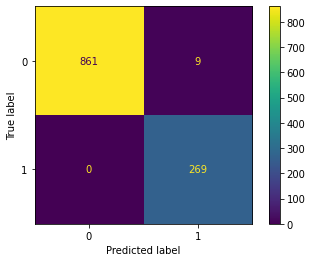

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred,labels=classifier.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

In [ ]:
y_train.shape,y_pred.shape

((4556,), (1139,))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3457
           1       0.98      1.00      0.99      1099

    accuracy                           1.00      4556
   macro avg       0.99      1.00      0.99      4556
weighted avg       1.00      1.00      1.00      4556



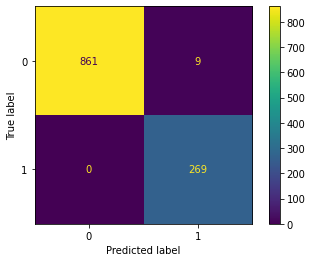

In [ ]:
y_pred1=classifier.predict(x_train)
print(classification_report(y_train,y_pred1))
cm1=confusion_matrix(y_train,y_pred1,labels=classifier.classes_)
disp1=ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=classifier.classes_)
disp.plot()

In [ ]:
x_test.shape

(1139, 37303)

In [ ]:
message7="hello world from python 3. and it is a clear spam"
bow5=cv.transform([message7]).toarray()
bow5

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
bow5

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_pred5=classifier.predict(bow5)

In [ ]:
message_bow[1]

<1x37303 sparse matrix of type '<class 'numpy.int64'>'
	with 64 stored elements in Compressed Sparse Row format>

In [ ]:
type(x_test)

scipy.sparse.csr.csr_matrix

In [ ]:
x_test[1]

<1x37303 sparse matrix of type '<class 'numpy.int64'>'
	with 155 stored elements in Compressed Sparse Row format>

In [ ]:
y_pred5

array([1])

In [ ]:
import pickle
model_freeze=pickle.dump(classifier,open("Model_classifier_spam.pkl","wb"))
vec=pickle.dump(cv,open("Count_vector.pkl","wb"))